In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
import os

In [3]:
data_dir = "C:/Users/Kelvin Chumbe/Desktop/ALX Assignment Docs/data"

In [4]:
member_db = pd.read_csv(os.path.join(data_dir, 'Member database.csv'))

In [5]:
member_db.head(2)

,First Name,Last Name,Email,Gender,Institution,Year of Graduation,Graduation Month
0,April,Kelley,a.kelley@randatmail.com,Female,ALU Rwanda,2021.0,January
1,Alexia,Nelson,a.nelson@randatmail.com,Female,ALU Rwanda,2022.0,January


In [6]:
member_engagement = pd.read_csv(os.path.join(data_dir, 'Member engagement.csv'))

In [7]:
member_engagement.head(2)

,First Name,Last Name,Email,Gender,Age,Institution,Year of Graduation,Graduation Month,Already Attended Reception,Joined Facebook Group,Attended The Living Room 1.0,Attended Room With A View 1.0
0,Penelope,Adams,p.adams@randatmail.com,Female,18,ALU Rwanda,2023.0,January,No,Yes,No,No
1,Catherine,Adams,c.adams@randatmail.com,Female,28,ALX,2019.0,April,Yes,Yes,Yes,No


## Data Cleaning

### Member Database

In [8]:
# Check for null values
member_db.isnull().sum()

First Name            0
Last Name             0
Email                 0
Gender                0
Institution           0
Year of Graduation    5
Graduation Month      5
dtype: int64

#### Observation:
* 5 records with null values for Year of Graduation and Graduation Month. 

In [9]:
member_db[member_db['Year of Graduation'].isnull()]

,First Name,Last Name,Email,Gender,Institution,Year of Graduation,Graduation Month
3,Oscar,Evans,o.evans@randatmail.com,Male,ALU Alumni,NaN,NaN
10,Fiona,Armstrong,f.armstrong@randatmail.com,Female,ALU Alumni,NaN,NaN
14,Alissa,Parker,a.parker@randatmail.com,Female,ALU Alumni,NaN,NaN
31,Spike,Stevens,s.stevens@randatmail.com,Male,ALU Alumni,NaN,NaN
33,Jenna,Russell,j.russell@randatmail.com,Female,ALU Mauritius,NaN,NaN


#### Observation:
* Use the member's age to create age-group bins then compute the mode values for each bin to impute the null values

In [10]:
# Check for any duplicated records
member_db[member_db[['Email', 'First Name', 'Last Name']].duplicated(keep=False)]

,First Name,Last Name,Email,Gender,Institution,Year of Graduation,Graduation Month


#### Observation:
* No duplicated records

In [11]:
member_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   First Name          100 non-null    object 
 1   Last Name           100 non-null    object 
 2   Email               100 non-null    object 
 3   Gender              100 non-null    object 
 4   Institution         100 non-null    object 
 5   Year of Graduation  95 non-null     float64
 6   Graduation Month    95 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


#### Observation
* Year of Graduation should be an integer not float 

In [12]:
# Convert Year of Graduation to int64 
# member_db['Year of Graduation'] = member_db['Year of Graduation'].apply(lambda x: int(x) if pd.notna(x) else x)

In [13]:
# Convert Year of Graduation to int64 
member_db['Year of Graduation'] = member_db['Year of Graduation'].astype('Int64')

In [14]:
member_db.head()

,First Name,Last Name,Email,Gender,Institution,Year of Graduation,Graduation Month
0,April,Kelley,a.kelley@randatmail.com,Female,ALU Rwanda,2021,January
1,Alexia,Nelson,a.nelson@randatmail.com,Female,ALU Rwanda,2022,January
2,Tara,Barnes,t.barnes@randatmail.com,Female,ALU Rwanda,2022,January
3,Oscar,Evans,o.evans@randatmail.com,Male,ALU Alumni,<NA>,NaN
4,Mary,Craig,m.craig@randatmail.com,Female,ALU Rwanda,2021,July


## Data Exploration

#### What is the gender distribution of our members?


<AxesSubplot:ylabel='Gender'>

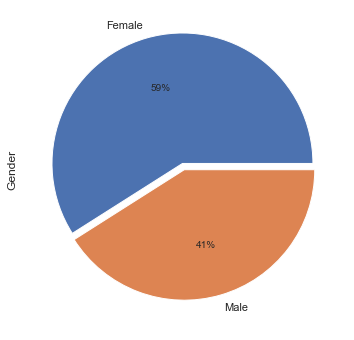

In [15]:
# Plot a pie chart to show the gender composition
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

member_db['Gender'].value_counts().plot(kind='pie', ax=ax, explode=[0.05, 0.0], autopct='%1.0f%%')

#### Observation:
* There are more female members than males

#### Which institution do our members come from?

<AxesSubplot:>

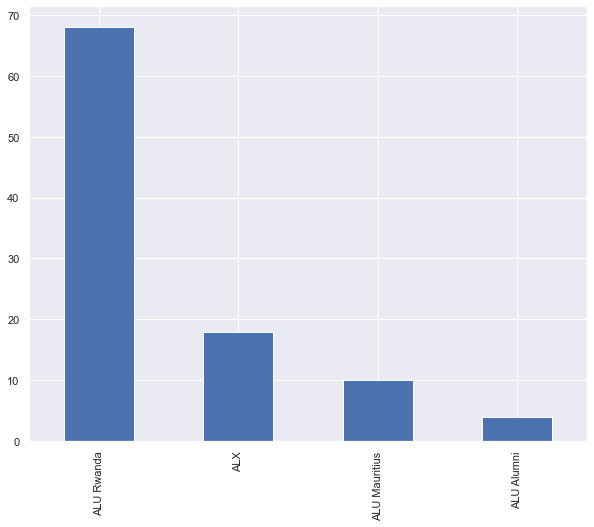

In [16]:
# Plot a bar chart to show member distribution from the institutions
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.gca()

member_db['Institution'].value_counts().plot(kind='bar', ax=ax1)

# fig2 = plt.figure(figsize=(10,8))
# ax2 = fig2.gca()
# member_db['Institution'].value_counts().plot(kind='pie', ax=ax2, explode=[0.05, 0.05, 0.05, 0.05], autopct='%1.0f%%')

#### When are our members graduating?  

<AxesSubplot:>

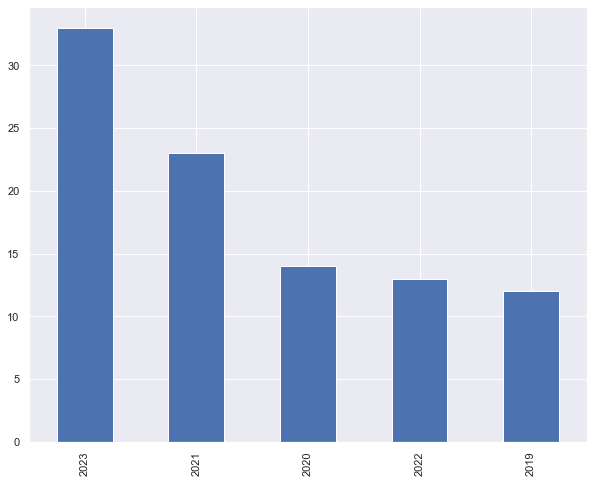

In [17]:
# Plot a bar plot of Graduation distribution
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.gca()

member_db['Year of Graduation'].value_counts().plot(kind='bar', ax=ax1)


#### How many of our members have graduated?

In [18]:
member_db.loc[member_db['Year of Graduation'] < 2021, 'Status'] = 'Graduated'
member_db.loc[member_db['Year of Graduation'] >= 2021, 'Status'] = 'Not Graduated'

<AxesSubplot:>

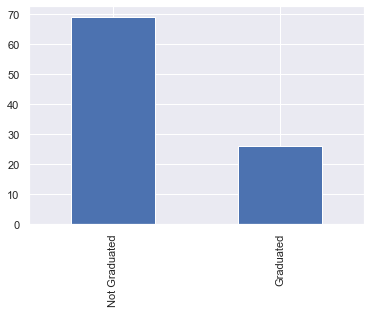

In [19]:
member_db['Status'].value_counts().plot(kind='bar')

### Member Engagement

In [20]:
member_engagement.head()

,First Name,Last Name,Email,Gender,Age,Institution,Year of Graduation,Graduation Month,Already Attended Reception,Joined Facebook Group,Attended The Living Room 1.0,Attended Room With A View 1.0
0,Penelope,Adams,p.adams@randatmail.com,Female,18,ALU Rwanda,2023.0,January,No,Yes,No,No
1,Catherine,Adams,c.adams@randatmail.com,Female,28,ALX,2019.0,April,Yes,Yes,Yes,No
2,Aida,Adams,a.adams@randatmail.com,Female,30,ALU Rwanda,2023.0,January,No,No,Yes,Yes
3,Sawyer,Adams,s.adams@randatmail.com,Male,23,ALU Rwanda,2022.0,January,Yes,Yes,No,Yes
4,Adam,Allen,a.allen@randatmail.com,Male,29,ALU Rwanda,2021.0,January,Yes,No,No,No


In [21]:
# Check for null values
member_engagement.isnull().sum()

First Name                       0
Last Name                        0
Email                            0
Gender                           0
Age                              0
Institution                      0
Year of Graduation               5
Graduation Month                 5
Already Attended Reception       0
Joined Facebook Group            0
Attended The Living Room 1.0     0
Attended Room With A View 1.0    0
dtype: int64

#### Observation:
* 5 records with null values for Year of Graduation and Graduation Month

In [22]:
member_engagement[member_engagement['Graduation Month'].isnull()]

,First Name,Last Name,Email,Gender,Age,Institution,Year of Graduation,Graduation Month,Already Attended Reception,Joined Facebook Group,Attended The Living Room 1.0,Attended Room With A View 1.0
5,Fiona,Armstrong,f.armstrong@randatmail.com,Female,20,ALU Alumni,NaN,NaN,Yes,Yes,Yes,Yes
28,Oscar,Evans,o.evans@randatmail.com,Male,19,ALU Alumni,NaN,NaN,Yes,No,Yes,No
62,Alissa,Parker,a.parker@randatmail.com,Female,21,ALU Alumni,NaN,NaN,Yes,No,Yes,Yes
75,Jenna,Russell,j.russell@randatmail.com,Female,19,ALU Mauritius,NaN,NaN,No,Yes,No,No
79,Spike,Stevens,s.stevens@randatmail.com,Male,28,ALU Alumni,NaN,NaN,Yes,Yes,Yes,No


In [23]:
member_engagement.loc[(member_engagement['Age'] >= 18) & (member_engagement['Age'] < 25), 'Age Group'] = 'Youth'
member_engagement.loc[(member_engagement['Age'] >= 25) & (member_engagement['Age'] <= 30), 'Age Group'] = 'Adult'

In [31]:
median_adult_grad_year = member_engagement[member_engagement['Age Group'] == 'Adult']['Year of Graduation'].median()
mode_adult_grad_month = member_engagement[member_engagement['Age Group'] == 'Adult']['Graduation Month'].mode().values[0]
median_youth_grad_year = member_engagement[member_engagement['Age Group'] == 'Youth']['Year of Graduation'].median()
mode_youth_grad_month = member_engagement[member_engagement['Age Group'] == 'Youth']['Graduation Month'].mode().values[0]

In [52]:
median_adult_grad_year, mode_adult_grad_month, median_youth_grad_year, mode_youth_grad_month

(2022.0, 'January', 2021.0, 'January')

In [33]:
member_engagement.loc[(member_engagement['Year of Graduation'].isnull()) & (member_engagement['Age Group'] == 'Adult'), 'Year of Graduation'] = median_adult_grad_year
member_engagement.loc[(member_engagement['Graduation Month'].isnull()) & (member_engagement['Age Group'] == 'Adult'), 'Graduation Month'] = mode_adult_grad_month
member_engagement.loc[(member_engagement['Year of Graduation'].isnull()) & (member_engagement['Age Group'] == 'Youth'), 'Year of Graduation'] = median_youth_grad_year
member_engagement.loc[(member_engagement['Graduation Month'].isnull()) & (member_engagement['Age Group'] == 'Youth'), 'Graduation Month'] = mode_youth_grad_month

In [34]:
member_engagement.isnull().sum()

First Name                       0
Last Name                        0
Email                            0
Gender                           0
Age                              0
Institution                      0
Year of Graduation               0
Graduation Month                 0
Already Attended Reception       0
Joined Facebook Group            0
Attended The Living Room 1.0     0
Attended Room With A View 1.0    0
Age Group                        0
dtype: int64

In [35]:
# Check for any duplicated records
member_engagement[member_engagement[['Email', 'First Name', 'Last Name']].duplicated(keep=False)]

,First Name,Last Name,Email,Gender,Age,Institution,Year of Graduation,Graduation Month,Already Attended Reception,Joined Facebook Group,Attended The Living Room 1.0,Attended Room With A View 1.0,Age Group


#### Observation:
* No duplicated records

In [36]:
member_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   First Name                     100 non-null    object 
 1   Last Name                      100 non-null    object 
 2   Email                          100 non-null    object 
 3   Gender                         100 non-null    object 
 4   Age                            100 non-null    int64  
 5   Institution                    100 non-null    object 
 6   Year of Graduation             100 non-null    float64
 7   Graduation Month               100 non-null    object 
 8   Already Attended Reception     100 non-null    object 
 9   Joined Facebook Group          100 non-null    object 
 10  Attended The Living Room 1.0   100 non-null    object 
 11  Attended Room With A View 1.0  100 non-null    object 
 12  Age Group                      100 non-null    obje

In [37]:
member_engagement['Year of Graduation'] = member_engagement['Year of Graduation'].astype('Int64')

#### What the gender distribution on our engagement?

In [38]:
# Plot a pie chart to show the gender composition
# fig = plt.figure(figsize=(8,6))
# ax = fig.gca()

# member_engagement['Gender'].value_counts().plot(kind='pie', ax=ax, explode=[0.05, 0.0], autopct='%1.0f%%')

<AxesSubplot:>

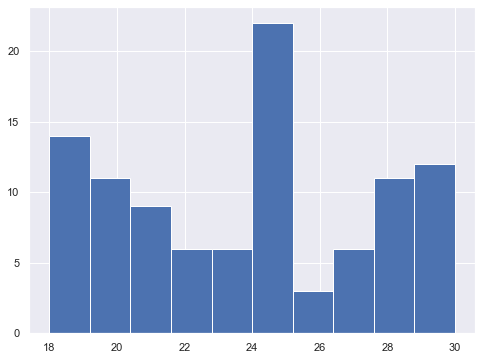

In [39]:
# Plot a histogram to show the age distribution
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

member_engagement['Age'].hist(ax=ax)

<AxesSubplot:ylabel='Already Attended Reception'>

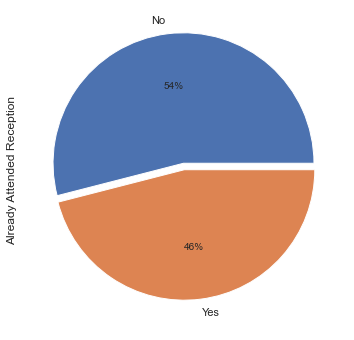

In [40]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

member_engagement['Already Attended Reception'].value_counts().plot(kind='pie', ax=ax, explode=[0.05, 0.0], autopct='%1.0f%%')

<AxesSubplot:title={'center':"No. of Females who've joined Facebook Group"}, ylabel='Joined Facebook Group'>

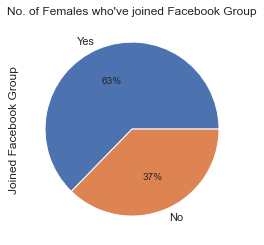

In [41]:
plt.title("No. of Females who've joined Facebook Group")
member_engagement[member_engagement['Gender'] == 'Female']['Joined Facebook Group'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:title={'center':"No. of Males who've joined Facebook Group"}, ylabel='Joined Facebook Group'>

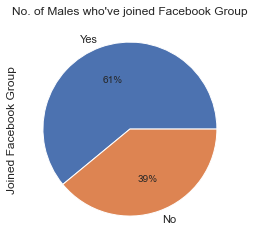

In [42]:
plt.title("No. of Males who've joined Facebook Group")
member_engagement[member_engagement['Gender'] == 'Male']['Joined Facebook Group'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:xlabel='Gender,Already Attended Reception'>

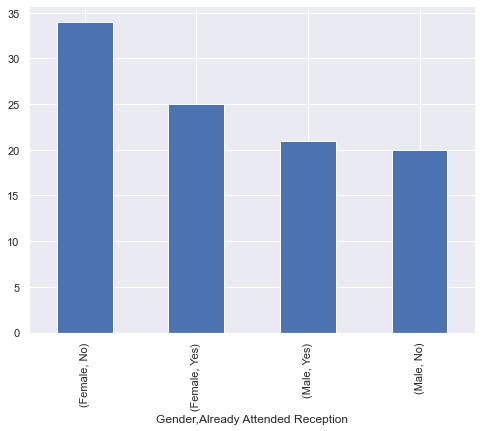

In [48]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

member_engagement.groupby('Gender')['Already Attended Reception'].value_counts().plot(kind='bar', ax=ax)

<AxesSubplot:ylabel='Joined Facebook Group'>

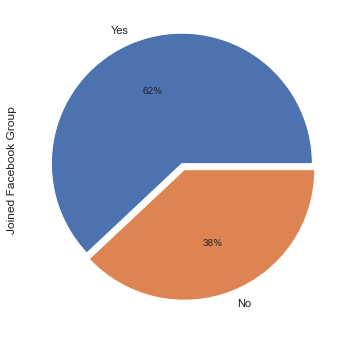

In [49]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

member_engagement['Joined Facebook Group'].value_counts().plot(kind='pie', ax=ax, explode=[0.05, 0.0], autopct='%1.0f%%')

<AxesSubplot:ylabel='Attended The Living Room 1.0'>

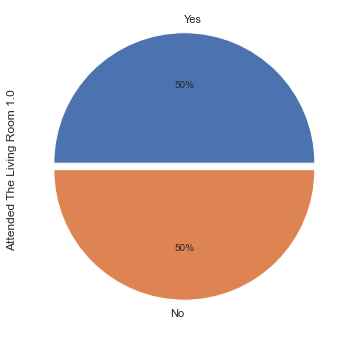

In [50]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

member_engagement['Attended The Living Room 1.0'].value_counts().plot(kind='pie', ax=ax, explode=[0.05, 0.0], autopct='%1.0f%%')

<AxesSubplot:ylabel='Attended Room With A View 1.0'>

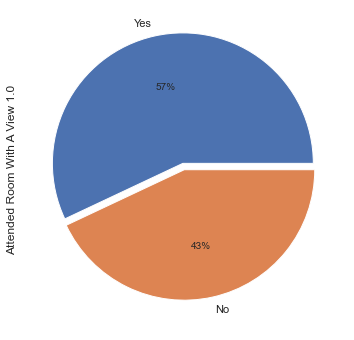

In [51]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

member_engagement['Attended Room With A View 1.0'].value_counts().plot(kind='pie', ax=ax, explode=[0.05, 0.0], autopct='%1.0f%%')

In [53]:
member_engagement.head()

,First Name,Last Name,Email,Gender,Age,Institution,Year of Graduation,Graduation Month,Already Attended Reception,Joined Facebook Group,Attended The Living Room 1.0,Attended Room With A View 1.0,Age Group
0,Penelope,Adams,p.adams@randatmail.com,Female,18,ALU Rwanda,2023,January,No,Yes,No,No,Youth
1,Catherine,Adams,c.adams@randatmail.com,Female,28,ALX,2019,April,Yes,Yes,Yes,No,Adult
2,Aida,Adams,a.adams@randatmail.com,Female,30,ALU Rwanda,2023,January,No,No,Yes,Yes,Adult
3,Sawyer,Adams,s.adams@randatmail.com,Male,23,ALU Rwanda,2022,January,Yes,Yes,No,Yes,Youth
4,Adam,Allen,a.allen@randatmail.com,Male,29,ALU Rwanda,2021,January,Yes,No,No,No,Adult


In [59]:
member_engagement['Attended The Living Room 1.0'].value_counts() / member_engagement.shape[0]

Yes    0.5
No     0.5
Name: Attended The Living Room 1.0, dtype: float64

In [58]:
member_engagement[(member_engagement[ 'Already Attended Reception'] == 'No') & 
                  (member_engagement[ 'Joined Facebook Group'] == 'No') & 
                  (member_engagement[ 'Attended The Living Room 1.0'] == 'No') &
                  (member_engagement[ 'Attended Room With A View 1.0'] == 'No')]

,First Name,Last Name,Email,Gender,Age,Institution,Year of Graduation,Graduation Month,Already Attended Reception,Joined Facebook Group,Attended The Living Room 1.0,Attended Room With A View 1.0,Age Group
24,Brooke,Douglas,b.douglas@randatmail.com,Female,20,ALU Rwanda,2023,January,No,No,No,No,Youth
27,Abraham,Ellis,a.ellis@randatmail.com,Male,18,ALU Rwanda,2023,January,No,No,No,No,Youth
47,Jessica,Mitchell,j.mitchell@randatmail.com,Female,25,ALU Rwanda,2023,January,No,No,No,No,Adult
55,Martin,Morris,m.morris@randatmail.com,Male,30,ALU Rwanda,2023,January,No,No,No,No,Adult
57,Fenton,Murray,f.murray@randatmail.com,Male,28,ALU Rwanda,2021,January,No,No,No,No,Adult
72,Mary,Ross,m.ross@randatmail.com,Female,30,ALU Rwanda,2023,January,No,No,No,No,Adult
